In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [3]:
from langchain_community.llms import Ollama

llm = Ollama(model="gemma2:27b")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [4]:
graph_builder.add_edge(START, "chatbot")

In [5]:
graph_builder.add_edge("chatbot", END)

In [6]:
graph = graph_builder.compile()

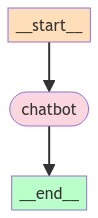

In [7]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [11]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            # print("Assistant:", value["messages"][-1].content)
            print(value)

{'messages': ["That's nice to know, Rahul!\n\nIs there anything else I can help you with? 😊  Let me know if you have any questions or tasks."]}
{'messages': ['As an AI, I have no memory of past interactions and cannot access personal information like your name.\n\nCould you please tell me your name so I can address you properly?']}
{'messages': ["Bard: Hello! 👋\n\nHow can I help you today? 😊  Tell me what's on your mind and I'll do my best to provide a thoughtful response."]}


KeyboardInterrupt: 